# Modelling: desicion tree and random forest

In [88]:
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import plotly.express as px #visualization
import missingno as msno #missing no analysis

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree

df = pd.read_csv("cleaned_data.csv")

In [89]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#her bir feature için min max değerleri buluyoruz
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


In [90]:
models = [("DTC", DecisionTreeClassifier(max_depth=10)),
          ("RF", RandomForestClassifier())]

finalResult = [] #score
cmList = [] #confusion matrix list

for name, model in models:
    model.fit(X_train, y_train) #training

    model_result = model.predict(X_test)
    score = precision_score(y_test, model_result)

    finalResult.append((name, score))

    cm = confusion_matrix(y_test, model_result)
    cmList.append((name, cm))

In [91]:
print(finalResult)

[('DTC', 0.6822429906542056), ('RF', 0.8059701492537313)]


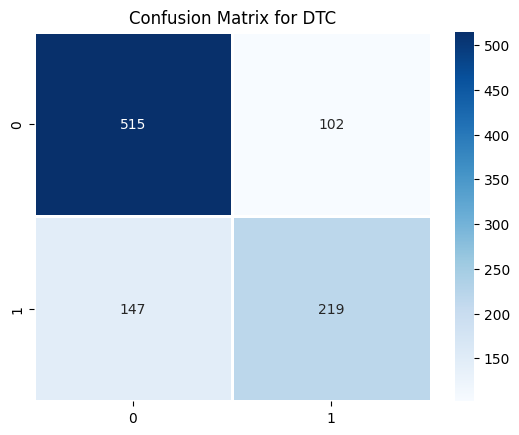

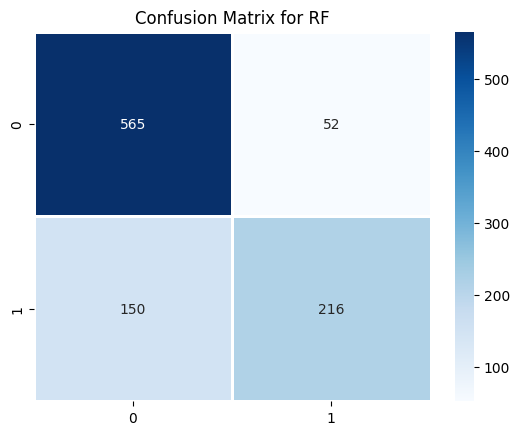

In [92]:
for name, cm in cmList:
    plt.figure()  # Yeni bir figür oluştur
    sns.heatmap(cm, annot=True, linewidths=0.8, fmt="d", cmap="Blues")  # fmt="d" tam sayı formatı
    plt.title(f"Confusion Matrix for {name}")
    
    # Heatmap'i dosya olarak kaydet
    filename = f"confusion_matrix_{name}.png"  # Dosya adı
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Dosyayı kaydet
    
    plt.show()  # Grafiği görüntüle

# Evaluation: desicion tree visualization

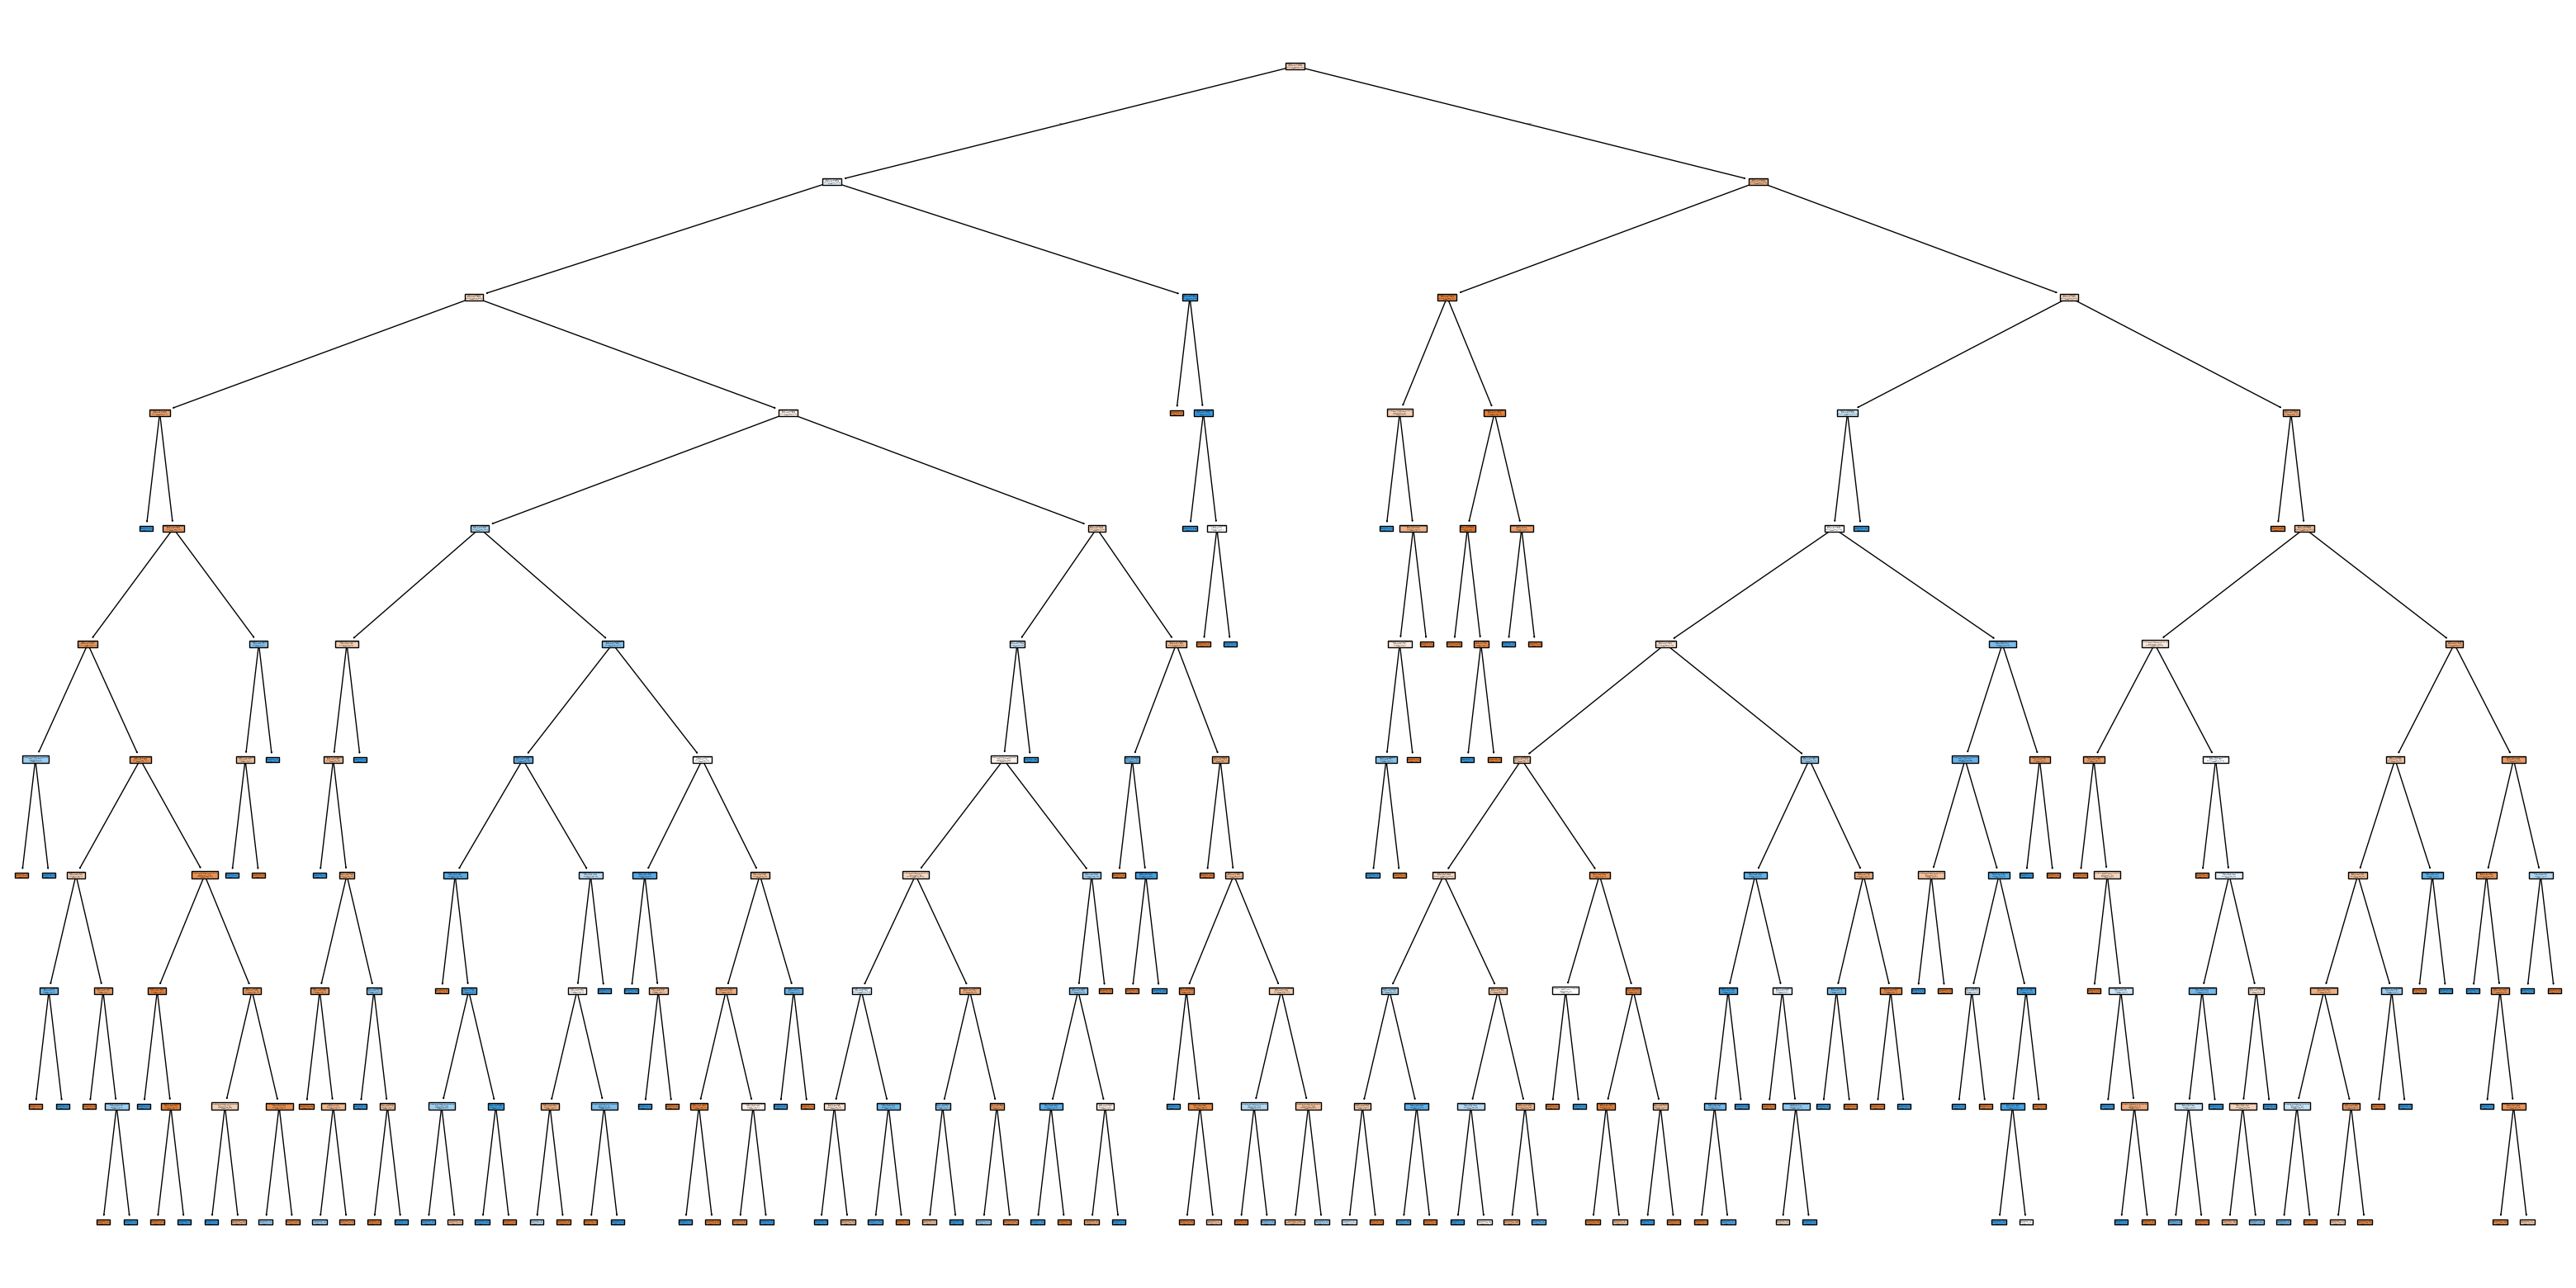

In [93]:
# DecisionTreeClassifier modelini seç
dt_clf = models[0][1]  # 'models' listesindeki ilk modelin sınıflandırıcı kısmını seçiyoruz.

# Yeni bir figür başlat
plt.figure(figsize=(40, 20))  # Görselin boyutunu artırdık, genişlik ve yükseklik büyütüldü.

# Decision Tree yapısını çiz
plot_tree(
    dt_clf,  # Çizilecek karar ağacı modeli
    feature_names=df.columns.tolist()[:-1],  # Özniteliklerin isimlerini belirt (son sütun hariç, çünkü o hedef değişken)
    class_names=["0", "1"],  # Modelin tahmin ettiği sınıfların isimleri
    filled=True,  # Düğümleri renklerle doldur (sınıf dağılımına göre)
    precision=5  # Gösterilen değerlerde 5 ondalık basamak kullan
)

# Grafiği bir PNG dosyasına kaydet
plt.savefig("decision_tree_high_quality.png", dpi=600, bbox_inches="tight")  # Daha yüksek DPI ile kaydet

# Grafiği göster
plt.show()  # Karar ağacı yapısını görselleştir.
